In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import *
from sklearn.metrics.pairwise import cosine_similarity

# from rdkit import Chem
# from rdkit.Chem import AllChem

In [2]:
cellines = pd.read_csv("nci_gdsc.csv")
gdsc1 = pd.read_excel(
    "GDSC1_fitted_dose_response_27Oct23.xlsx",
    usecols=["CELL_LINE_NAME", "DRUG_NAME", "LN_IC50"],
)
gdsc1 = gdsc1[gdsc1["CELL_LINE_NAME"].isin(list(cellines["gdsc1"]))]

gdsc2 = pd.read_excel(
    "gdsc2_fitted_dose_response_27Oct23.xlsx",
    usecols=["CELL_LINE_NAME", "DRUG_NAME", "LN_IC50"],
)
gdsc2 = gdsc2[gdsc2["CELL_LINE_NAME"].isin(list(cellines["gdsc2"]))]

df = pd.concat([gdsc1, gdsc2]).reset_index(drop=True)
df = df.groupby(["CELL_LINE_NAME", "DRUG_NAME"]).LN_IC50.mean().reset_index()
df["mmol"] = np.exp(df["LN_IC50"])
df

,CELL_LINE_NAME,DRUG_NAME,LN_IC50,mmol
0,786-0,(5Z)-7-Oxozeaenol,0.769227,2.158097
1,786-0,123138,2.952488,19.153549
2,786-0,123829,-0.170640,0.843125
3,786-0,150412,2.385222,10.861474
4,786-0,5-Fluorouracil,2.643826,14.066928
...,...,...,...,...
27652,UACC-62,ascorbate (vitamin C),11.003039,60056.375997
27653,UACC-62,"eEF2K Inhibitor, A-484954",5.334347,207.337313
27654,UACC-62,glutathione,7.875803,2632.799480
27655,UACC-62,kb NB 142-70,4.169205,64.664024


In [3]:
print("Unique Drug", len(set(df["DRUG_NAME"])))
print("Unique Cell Line", len(set(df["CELL_LINE_NAME"])))

Unique Drug 542
Unique Cell Line 55


In [4]:
drugs = sorted(set(df["DRUG_NAME"]))
drugs

['(5Z)-7-Oxozeaenol',
 '123138',
 '123829',
 '150412',
 '5-Fluorouracil',
 '5-azacytidine',
 '50869',
 '615590',
 '630600',
 '667880',
 '720427',
 '729189',
 '741909',
 '743380',
 '765771',
 '776928',
 '965-D2',
 '993-D2',
 'A-366',
 'A-443654',
 'A-770041',
 'A-83-01',
 'ABT737',
 'ACY-1215',
 'AGI-5198',
 'AGI-6780',
 'AGK2',
 'AICA Ribonucleotide',
 'AKT inhibitor VIII',
 'AMG-319',
 'AR-42',
 'ARRY-520',
 'AS601245',
 'AS605240',
 'AST-1306',
 'AT-7519',
 'AT13148',
 'AT7867',
 'AZ20',
 'AZ6102',
 'AZ628',
 'AZ960',
 'AZD1208',
 'AZD1332',
 'AZD1480',
 'AZD2014',
 'AZD3514',
 'AZD3759',
 'AZD4547',
 'AZD4877',
 'AZD5153',
 'AZD5363',
 'AZD5438',
 'AZD5582',
 'AZD5991',
 'AZD6094',
 'AZD6482',
 'AZD6738',
 'AZD7762',
 'AZD7969',
 'AZD8055',
 'AZD8186',
 'AZD8835',
 'AZD8931',
 'Acetalax',
 'Afatinib',
 'Afuresertib',
 'Alectinib',
 'Alisertib',
 'Alpelisib',
 'Amuvatinib',
 'Apitolisib',
 'Ara-G',
 'Avagacestat',
 'Axitinib',
 'BAM7',
 'BAY ACCi',
 'BAY AKT1',
 'BAY-61-3606',
 'BAY-

In [5]:
nsc_name = pd.read_csv("nsc_cid_smiles_class_name.csv", index_col=0)[["NAME", "NSC"]]
tmp = pd.read_csv("nsc_name.csv")[["NSC #", "Drug name"]]
tmp.columns = ["NSC", "NAME"]
nsc_name = pd.concat([nsc_name, tmp]).drop_duplicates()
nsc_name["NAME"] = nsc_name["NAME"].str.lower()
nsc_name

,NAME,NSC
0,p-toluquinone,1
1,4-amino-3-pentadecylphenol,17
2,3-(dimethylamino)propiophenone hydrochloride,89
3,cycloheximide,185
4,cycloheximide,758187
...,...,...
24975,c((l-pro)-xxx-xxx-xxx-(d-asp)-) where xxx = d-...,900911
24976,c((d-leu)-xxx-xxx-xxx-(d-asp)-) where xxx = d-...,900922
24977,"c(xxx-pro.psi.(ch2s)gly-xxx-xxx-asn), where xx...",900964
24978,"c(xxx-xxx-pro.psi.(ch2s)gly-xxx-xxx-xxx-asn), ...",900974


In [6]:
tmp = np.array(
    [
        ["AZ628", 782007],  # AZ628
        ["NVP-TAE684", 764041],  # NVP-TAE684
        ["Bicalutamide", 759816],  # Bicalutamide
        ["Bicalutamide", 722665],  # Bicalutamide
        ["BAY-61-3606", 766992],  # BAY-61-3606
        ["GW-2580", 756292],  # GW-2580
        ["Ruxolitinib", 763371],  # Ruxolitinib
        ["Ruxolitinib", 800874],  # Ruxolitinib
        ["GSK1070916", 777445],  # GSK1070916
        ["GSK1070916", 800108],  # GSK1070916
        ["AR-42", 736012],  # AR-42
        ["JNJ38877605", 759095],  # JNJ38877605
        ["JNJ38877605", 800776],  # JNJ38877605
        ["SU11274", 747693],  # SU11274
        ["OSI-930", 766887],  # OSI-930
        ["OSI-930", 800811],  # OSI-930
        ["GSK690693", 766991],  # GSK690693
        ["GSK690693", 800766],  # GSK690693
        ["CI-1033", 780019],  # CI-1033
        ["CI-1033", 801011],  # CI-1033
        ["PF-00299804", 765888],  # PF-00299804
        ["PF-00299804", 800084],  # PF-00299804
        ["AZD7762", 757148],  # AZD7762
        ["AZD7762", 799350],  # AZD7762
        ["GW441756", 756236],  # GW441756
        ["PD173074", 766908],  # PD173074
        ["SB590885", 754362],  # SB590885
        ["SB590885", 756456],  # SB590885
        ["Cetuximab", 714692],  # Cetuximab
        ["Rucaparib", 756644],  # Rucaparib
        ["torin2", 775727],  # torin2
        ["AZD3514", 765776],  # AZD3514
        ["AZD5438", 799348],  # AZD5438
        ["AZD6094", 782121],  # AZD6094
        ["AZD6094", 800966],  # AZD6094
        ["AZD8931", 758005],  # AZD8931
        ["AZD8931", 800876],  # AZD8931
        ["AZD1480", 756648],  # AZD1480
        ["AZD1480", 799344],  # AZD1480
        ["AZD1208", 776066],  # AZD1208
        ["AZD1208", 799343],  # AZD1208
        ["SN-38", 673596],  # SN-38
        ["Niraparib", 754355],  # Niraparib
        ["Niraparib", 800020],  # Niraparib
        ["PRT062607", 776786],  # PRT062607
        ["Romidepsin", 630176],  # Romidepsin
        ["Romidepsin", 754143],  # Romidepsin
        ["LMP744", 706743],  # LMP744
        ["LY2109761", 765632],  # LY2109761
        ["AZD3759", 788121],  # AZD3759
        ["AZD3759", 800978],  # AZD3759
        ["AZD5363", 764039],  # AZD5363
        ["AZD5363", 782347],  # AZD5363
        ["AZD5363", 799347],  # AZD5363
        ["GDC0810", 787326],  # GDC0810
        ["MK-8776", 764659],  # MK-8776
        ["AT13148", 771650],  # AT13148
        ["AT13148", 799337],  # AT13148
    ]
)

In [7]:
nsc_name = pd.concat(
    [nsc_name, pd.DataFrame(tmp, columns=["NAME", "NSC"])]
).reset_index(drop=True)
nsc_name

,NAME,NSC
0,p-toluquinone,1
1,4-amino-3-pentadecylphenol,17
2,3-(dimethylamino)propiophenone hydrochloride,89
3,cycloheximide,185
4,cycloheximide,758187
...,...,...
42952,AZD5363,799347
42953,GDC0810,787326
42954,MK-8776,764659
42955,AT13148,771650


In [8]:
nsc_name["NAME"] = nsc_name.NAME.str.lower()
nsc_name

,NAME,NSC
0,p-toluquinone,1
1,4-amino-3-pentadecylphenol,17
2,3-(dimethylamino)propiophenone hydrochloride,89
3,cycloheximide,185
4,cycloheximide,758187
...,...,...
42952,azd5363,799347
42953,gdc0810,787326
42954,mk-8776,764659
42955,at13148,771650


In [9]:
pchem = [
    ["5-azacytidine", 758186],  # 5-azacytidine
    ["5-fluorouracil", 19893],  # 5-fluorouracil
    ["5-fluorouracil", 757036],  # 5-fluorouracil
    ["5-fluorouracil", 816997],  # 5-fluorouracil
    ["abt737", 758873],  # abt737
    ["acy-1215", 767952],  # acy-1215
    ["agi-5198", 773096],  # agi-5198
    ["agi-6780", 781409],  # agi-6780
    ["aica ribonucleotide", 283955],  # aica ribonucleotide
    ["aica ribonucleotide", 292227],  # aica ribonucleotide
    ["alpha-lipoic acid", 758651],  # alpha-lipoic acid
    ["alpha-lipoic acid", 90788],  # alpha-lipoic acid
    ["ara-g", 76352],  # ara-g
    ["ascorbate (vitamin c)", 33832],  # ascorbate (vitamin c)
    ["ascorbate (vitamin c)", 218455],  # ascorbate (vitamin c)
    ["azd2014", 767189],  # azd2014
    ["azd2014", 780879],  # azd2014
    ["azd2014", 787289],  # azd2014
    ["azd2014", 799345],  # azd2014
    ["azd5153", 797938],  # azd5153
    ["azd5991", 807055],  # azd5991
    ["azd6482", 799349],  # azd6482
    ["azd6738", 780249],  # azd6738
    ["azd6738", 800979],  # azd6738
    ["azd8055", 758871],  # azd8055
    ["azd8055", 799351],  # azd8055
    ["azd8186", 777572],  # azd8186
    ["azd8186", 799352],  # azd8186
    ["azd8835", 786099],  # azd8835
    ["bam7", 768536],  # bam7
    ["bexarotene", 741061],  # bexarotene
    ["bexarotene", 747528],  # bexarotene
    ["bexarotene", 783322],  # bexarotene
    ["bibf-1120", 756659],  # bibf-1120
    ["bibf-1120", 757442],  # bibf-1120
    ["bibf-1120", 800805],  # bibf-1120
    ["brivanib, bms-540215", 799368],  # brivanib, bms-540215
    ["c-75", 764756],  # c-75
    [" ci-1040", 765695],  # ci-1040
    ["cp724714", 780042],  # cp724714
    ["cp724714", 800078],  # cp724714
    ["cpi-613", 766888],  # cpi-613
    ["dactinomycin", 3053],  # dactinomycin
    ["doramapimod", 785337],  # doramapimod
    ["embelin", 91874],  # embelin
    ["epz004777", 775852],  # epz004777
    ["epz004777", 780043],  # epz004777
    ["epz5676", 778365],  # epz5676
    ["epz5676", 795144],  # epz5676
    ["fh535", 778746],  # fh535
    ["flavopiridol", 649890],  # flavopiridol
    ["flavopiridol", 799330],  # flavopiridol
    ["glutathione", 400639],  # glutathione
    ["glutathione", 758199],  # glutathione
    ["gsk1059615", 801012],  # gsk1059615
    ["gsk1904529a", 767951],  # gsk1904529a
    ["gsk2606414", 781627],  # gsk2606414
    ["gsk269962a", 756162],  # gsk269962a
    ["gsk2801", 772393],  # gsk2801
    ["gsk319347a", 756172],  # gsk319347a
    ["iox2", 794199],  # iox2
    ["iwp-2", 753606],  # iwp-2
    [" jq1", 760183],  # jq1
    [" jq1", 764043],  # jq1
    ["l-oxonoreleagnine", 147829],  # l-oxonoreleagnine
    ["lcl161", 772868],  # lcl161
    ["lenalidomide", 703813],  # lenalidomide
    ["lenalidomide", 747972],  # lenalidomide
    ["lgk974", 777639],  # lgk974
    ["linifanib", 764237],  # linifanib
    ["linifanib", 800783],  # linifanib
    ["mitomycin-c", 26980],  # mitomycin-c
    ["n-acetyl cysteine", 111180],  # n-acetyl cysteine
    ["nsc-207895", 207895],  # nsc-207895
    ["nsc-87877", 87877],  # nsc-87877
    ["nsc319726", 319726],  # nsc319726
    ["nutlin-3a (-)", 732664],  # nutlin-3a (-)
    ["nutlin-3a (-)", 756875],  # nutlin-3a (-)
    ["nutlin-3a (-)", 756876],  # nutlin-3a (-)
    ["nutlin-3a (-)", 763443],  # nutlin-3a (-)
    ["nvp-adw742", 767746],  # nvp-adw742
    ["obatoclax mesylate", 729280],  # obatoclax mesylate
    ["otx015", 778747],  # otx015
    ["pac-1", 743444],  # pac-1
    ["pd0325901", 755770],  # pd0325901
    ["pd0325901", 800840],  # pd0325901
    ["pfi-3", 783642],  # pfi-3
    ["pfi3", 783642],  # pfi3
    ["rvx-208", 771600],  # rvx-208
    ["s-trityl-l-cysteine", 83265],  # s-trityl-l-cysteine
    ["s-trityl-l-cysteine", 124663],  # s-trityl-l-cysteine
    ["sb52334", 127178],  # sb52334
    ["sch772984", 775636],  # sch772984
    ["schweinfurthin a", 696119],  # schweinfurthin a
    ["sorafenib", 724772],  # sorafenib
    ["sorafenib", 747971],  # sorafenib
    ["sorafenib", 800934],  # sorafenib
    ["tak-715", 785339],  # tak-715
    ["temozolomide", 759883],  # temozolomide
    ["temozolomide", 362856],  # temozolomide
    ["torin 2", 775727],  # torin 2
    ["trichostatin a", 311042],  # trichostatin a
    ["unc0638", 764517],  # unc0638
    ["ve821", 761070],  # ve821
    ["vx-702", 775665],  # vx-702
    ["vx-702", 800967],  # vx-702
    ["xav939", 755761],  # xav939
    ["y-39983", 800973],  # y-39983
]

In [10]:
nsc_name = pd.concat(
    [nsc_name, pd.DataFrame(pchem, columns=["NAME", "NSC"])]
).reset_index(drop=True)
nsc_name["NAME"] = nsc_name.NAME.str.lower()
nsc_name

,NAME,NSC
0,p-toluquinone,1
1,4-amino-3-pentadecylphenol,17
2,3-(dimethylamino)propiophenone hydrochloride,89
3,cycloheximide,185
4,cycloheximide,758187
...,...,...
43060,ve821,761070
43061,vx-702,775665
43062,vx-702,800967
43063,xav939,755761


In [11]:
nsc_name = nsc_name.rename(columns={"NAME": "DRUG_NAME"})
nsc_name

,DRUG_NAME,NSC
0,p-toluquinone,1
1,4-amino-3-pentadecylphenol,17
2,3-(dimethylamino)propiophenone hydrochloride,89
3,cycloheximide,185
4,cycloheximide,758187
...,...,...
43060,ve821,761070
43061,vx-702,775665
43062,vx-702,800967
43063,xav939,755761


In [12]:
df["DRUG_NAME"] = df["DRUG_NAME"].str.lower()
df

,CELL_LINE_NAME,DRUG_NAME,LN_IC50,mmol
0,786-0,(5z)-7-oxozeaenol,0.769227,2.158097
1,786-0,123138,2.952488,19.153549
2,786-0,123829,-0.170640,0.843125
3,786-0,150412,2.385222,10.861474
4,786-0,5-fluorouracil,2.643826,14.066928
...,...,...,...,...
27652,UACC-62,ascorbate (vitamin c),11.003039,60056.375997
27653,UACC-62,"eef2k inhibitor, a-484954",5.334347,207.337313
27654,UACC-62,glutathione,7.875803,2632.799480
27655,UACC-62,kb nb 142-70,4.169205,64.664024


In [13]:
tmp = df.merge(nsc_name)
tmp.NSC = tmp.NSC.astype(int)
tmp

,CELL_LINE_NAME,DRUG_NAME,LN_IC50,mmol,NSC
0,786-0,5-fluorouracil,2.643826,14.066928,19893
1,786-0,5-fluorouracil,2.643826,14.066928,757036
2,786-0,5-fluorouracil,2.643826,14.066928,816997
3,786-0,5-azacytidine,2.708250,15.002997,758186
4,786-0,abt737,3.258437,26.008854,758873
...,...,...,...,...,...
22229,UACC-62,alpha-lipoic acid,6.871506,964.399859,90788
22230,UACC-62,ascorbate (vitamin c),11.003039,60056.375997,33832
22231,UACC-62,ascorbate (vitamin c),11.003039,60056.375997,218455
22232,UACC-62,glutathione,7.875803,2632.799480,400639


In [14]:
len(set(tmp["NSC"]))

405

In [15]:
input_graph = pd.read_csv("drug_cell_gene.csv.gz", index_col=0)
d = input_graph.index[:269]
d

/var/folders/s4/6xgylm7x3yzgfsk6sbvk_7_c0000gn/T/ipykernel_74719/2945029941.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  input_graph = pd.read_csv("drug_cell_gene.csv.gz", index_col=0)


Index([     740,      752,      755,      762,     1390,     1895,     3053,
           3088,     6396,     8806,
       ...
       '765396', '765775', '767125', '768112', '768593', '772992', '783107',
       '784722', '789797', '791785'],
      dtype='object', length=269)

In [16]:
len(set([int(i) for i in d]) & set(tmp["NSC"]))

44

In [17]:
tmp = tmp[tmp.NSC.isin([int(i) for i in d])]
tmp = tmp.drop_duplicates()
tmp

,CELL_LINE_NAME,DRUG_NAME,LN_IC50,mmol,NSC
0,786-0,5-fluorouracil,2.643826,14.066928,19893
1,786-0,5-fluorouracil,2.643826,14.066928,757036
90,786-0,bleomycin,0.070787,1.073353,125066
91,786-0,bleomycin,0.070787,1.073353,758612
112,786-0,camptothecin,-3.436538,0.032176,94600
...,...,...,...,...,...
22189,UACC-62,teniposide,0.415691,1.515418,758667
22194,UACC-62,topotecan,-0.971859,0.378379,609699
22195,UACC-62,topotecan,-0.971859,0.378379,759263
22211,UACC-62,veliparib,4.573405,96.873354,752840


In [18]:
tmp["mmol"].mean()

102.22054195863485

In [19]:
tmp["mmol"].std()

332.1356289458777

In [20]:
tmp.sort_values("mmol")

,CELL_LINE_NAME,DRUG_NAME,LN_IC50,mmol,NSC
10481,MOLT-4,sn-38,-7.937211,0.000357,673596
11949,NCI-H460,dactinomycin,-7.486313,0.000561,3053
2733,CCRF-CEM,sn-38,-7.457520,0.000577,673596
19129,SR,dactinomycin,-7.212739,0.000737,3053
21339,U251,sn-38,-6.230871,0.001968,673596
...,...,...,...,...,...
10815,NCI-H226,nelarabine,8.169899,3532.987114,755985
10689,NCI-H226,dacarbazine,8.203211,3652.660189,45388
20354,TK10,dacarbazine,8.296279,4008.927387,45388
20480,TK10,nelarabine,8.559318,5215.123245,755985


In [21]:
gdsc_drug_response = tmp.pivot_table(
    index="NSC", columns="CELL_LINE_NAME", values="mmol", fill_value=None
)
gdsc_drug_response.index = list(gdsc_drug_response.index)
gdsc_drug_response.columns = list(gdsc_drug_response.columns)
gdsc_drug_response

,786-0,A498,A549,ACHN,BT-549,CAKI-1,CCRF-CEM,COLO-205,DU-145,EKVX,...,SN12C,SNB75,SR,SW620,T47D,TK10,U031,U251,UACC-257,UACC-62
740,0.066185,9.973001,1.671051,0.099662,2.017029,2.986404,0.024976,0.316775,1.778820,5.060296,...,5.090838,8.283719,0.014193,0.868263,0.862823,0.831950,3.288275,1.268832,0.731066,7.864532
3053,0.006050,0.060390,0.007459,0.010430,0.043539,0.029852,0.009071,0.011128,0.534363,0.149589,...,0.054736,0.006595,0.000737,0.010683,0.025402,0.336804,0.016463,0.013580,0.109625,0.039372
19893,14.066928,299.469477,71.498288,36.549810,87.441588,31.426438,18.589084,6.691603,251.362344,1524.818248,...,685.059708,56.374250,1.484434,58.261121,57.486406,373.848076,20.910596,97.461848,275.251713,180.698248
26271,191.056272,330.994249,344.696045,207.926988,394.144660,549.152950,66.464967,248.830763,256.867144,864.752207,...,298.018034,420.063546,57.198004,877.041227,239.386404,1349.533154,143.727623,366.566151,435.133552,92.673448
26980,0.067204,186.600506,0.160332,0.132927,0.623060,0.061052,0.062177,0.031871,0.029240,1.210775,...,3.146243,0.331102,0.033633,0.044239,7.676310,0.726214,0.395014,0.160675,1.477315,1.211371
45388,435.309381,282.007876,112.042246,726.293352,1143.353626,NaN,124.200848,322.286854,971.341397,263.750083,...,816.047856,NaN,73.710555,502.016004,408.261541,4008.927387,NaN,320.510488,1041.682007,620.654769
63878,1.231133,11.911032,0.217902,0.327365,5.111153,0.115105,0.084883,3.431644,26.330554,81.068948,...,6.676357,7.273328,0.486637,0.956164,18.204048,27.118686,1.160895,6.378657,7.192663,3.502344
94600,0.032176,0.283178,0.040354,0.023883,0.427911,0.038842,0.009515,0.275558,0.054001,2.797024,...,0.250606,0.145922,0.005179,0.041475,0.263248,2.299747,0.050199,0.030350,1.172642,0.031572
100880,0.032176,0.283178,0.040354,0.023883,0.427911,0.038842,0.009515,0.275558,0.054001,2.797024,...,0.250606,0.145922,0.005179,0.041475,0.263248,2.299747,0.050199,0.030350,1.172642,0.031572
118218,215.537735,556.342438,107.830980,229.508255,1.350137,NaN,4.531486,112.210548,627.323276,1339.503096,...,116.616760,NaN,146.641964,1290.745194,86.863854,2583.548189,NaN,310.940321,506.031540,0.527628


In [22]:
nci_dr = pd.read_csv("nci60Act.csv", index_col=0).loc[gdsc_drug_response.index]
nci_dr = nci_dr[cellines.nci60]
nci_dr.columns = list(cellines.gdsc1)
nci_dr = nci_dr.applymap(lambda x: 1 if x > 0 else (0 if x < 0 else np.nan))
nci_dr

/var/folders/s4/6xgylm7x3yzgfsk6sbvk_7_c0000gn/T/ipykernel_74719/698439456.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nci_dr = nci_dr.applymap(lambda x: 1 if x > 0 else (0 if x < 0 else np.nan))


,MCF7,MDA-MB-231,Hs-578-T,BT-549,T47D,SF268,SF295,SF539,SNB75,U251,...,PC-3,DU-145,786-0,A498,ACHN,CAKI-1,RXF393,SN12C,TK10,U031
740,1.0,0.0,0.0,0.0,0.0,1,1,1,0,1,...,1.0,1.0,1.0,0.0,1.0,1,0,1,0.0,1.0
3053,1.0,0.0,0.0,0.0,1.0,1,0,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0,0,1,0.0,0.0
19893,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,...,0.0,1.0,1.0,1.0,1.0,1,0,0,0.0,1.0
26271,0.0,NaN,NaN,NaN,NaN,0,0,0,0,0,...,NaN,NaN,NaN,0.0,NaN,0,0,0,NaN,0.0
26980,1.0,0.0,0.0,0.0,0.0,1,1,1,1,1,...,0.0,1.0,1.0,0.0,1.0,1,0,1,0.0,0.0
45388,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1.0,1.0
63878,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,...,0.0,1.0,1.0,0.0,1.0,1,0,1,0.0,1.0
94600,1.0,0.0,0.0,0.0,1.0,1,1,1,1,1,...,0.0,1.0,1.0,1.0,1.0,1,1,1,0.0,1.0
100880,1.0,0.0,0.0,0.0,1.0,1,1,1,1,1,...,0.0,1.0,1.0,0.0,1.0,1,1,1,0.0,1.0
118218,1.0,0.0,0.0,NaN,0.0,0,0,0,0,0,...,0.0,1.0,NaN,0.0,1.0,1,0,1,1.0,1.0


In [23]:
cells = []
drugs = []
for i in nci_dr.columns:
    if len(list(gdsc_drug_response[i].loc[nci_dr[i].isna()].index)) > 0:
        tmp = [
            dict(nsc_name[["NSC", "DRUG_NAME"]].values)[i]
            for i in list(gdsc_drug_response[i].loc[nci_dr[i].isna()].index)
        ]
        cells.extend([i] * len(tmp))
        drugs.extend(tmp)

In [24]:
tab = pd.DataFrame([cells, drugs]).T
tab[2] = np.zeros(len(tab)).astype(int)
tab[3] = np.zeros(len(tab)).astype(int)
tab.columns = ["cell lines", "drugs", "gdsc", "attention"]
tab

,cell lines,drugs,gdsc,attention
0,MCF7,epirubicin,0,0
1,MCF7,oxaliplatin,0,0
2,MDA-MB-231,cyclophosphamide,0,0
3,MDA-MB-231,oxaliplatin,0,0
4,Hs-578-T,cyclophosphamide,0,0
5,Hs-578-T,oxaliplatin,0,0
6,BT-549,cyclophosphamide,0,0
7,BT-549,fludarabine,0,0
8,BT-549,oxaliplatin,0,0
9,BT-549,nelarabine,0,0


In [25]:
sens = []
for i in nci_dr.columns:
    sens.extend(list(gdsc_drug_response[i].loc[nci_dr[i].isna()]))

In [26]:
atten = pd.read_csv("attention.csv.gz", index_col=0)
tmp = np.load("idxs.npy", allow_pickle=True)[1]
atten.index = tmp
atten.columns = tmp
atten

/var/folders/s4/6xgylm7x3yzgfsk6sbvk_7_c0000gn/T/ipykernel_74719/3489036267.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  atten = pd.read_csv("attention.csv.gz", index_col=0)


,740,752,755,762,1390,1895,3053,3088,6396,8806,...,ZNF207,ZNF22,ZNF580,ZNF593,ZNF706,ZNHIT1,ZNHIT3,ZNRD1,ZWINT,ZYX
740,0.000404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003412,0.003558,0.003408,0.003410,0.003498,0.003412,0.003494,0.003540,0.003394,0.003387
752,0.000000,0.000404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003327,0.003505,0.003340,0.003308,0.003361,0.003338,0.003412,0.003434,0.003295,0.003294
755,0.000000,0.000000,0.000404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003307,0.003430,0.003286,0.003286,0.003371,0.003272,0.003372,0.003386,0.003289,0.003258
762,0.000000,0.000000,0.000000,0.000404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003330,0.003448,0.003285,0.003300,0.003380,0.003285,0.003378,0.003418,0.003271,0.003272
1390,0.000000,0.000000,0.000000,0.000000,0.000404,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003382,0.003535,0.003351,0.003374,0.003419,0.003370,0.003442,0.003498,0.003341,0.003323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNHIT1,0.000404,0.000319,0.000413,0.000323,0.000405,0.000415,0.000411,0.000313,0.000312,0.000314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000404,0.000000,0.000000,0.000000,0.000000
ZNHIT3,0.000419,0.000321,0.000419,0.000320,0.000415,0.000422,0.000421,0.000312,0.000313,0.000314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000404,0.000000,0.000000,0.000000
ZNRD1,0.000407,0.000317,0.000414,0.000319,0.000407,0.000416,0.000411,0.000313,0.000312,0.000314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000404,0.000000,0.000000
ZWINT,0.000398,0.000316,0.000404,0.000315,0.000402,0.000411,0.000408,0.000309,0.000305,0.000310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000404,0.000000


In [27]:
drug_gene = atten.iloc[:269, 329:]
cell_gene = atten.iloc[269:329, 329:]

In [28]:
base = pd.DataFrame(
    np.zeros((len(drug_gene), len(cell_gene))),
    index=drug_gene.index,
    columns=cell_gene.index,
)
for i in base.index:
    for l in base.columns:
        base.loc[i, l] = cosine_similarity([drug_gene.loc[i], cell_gene.loc[l]])[0][1]

base = (base > 0.5).astype(int)
base = base.loc[nci_dr.index]

In [29]:
sens = []
atten = []
for i in nci_dr.columns:
    #     print(i)
    sens.extend(list(gdsc_drug_response[i].loc[nci_dr[i].isna()]))
    if i == "Hs-578-T":
        atten.extend(list(base["HS578T"].loc[nci_dr[i].isna()]))
    elif i == "COLO-205":
        atten.extend(list(base["COLO205"].loc[nci_dr[i].isna()]))
    elif i == "HCC2998":
        atten.extend(list(base["HCC_2998"].loc[nci_dr[i].isna()]))
    elif i == "HT-29":
        atten.extend(list(base["HT29"].loc[nci_dr[i].isna()]))
    elif i == "IGROV-1":
        atten.extend(list(base["IGROV1"].loc[nci_dr[i].isna()]))
    elif i == "RXF393":
        atten.extend(list(base["RXF_393"].loc[nci_dr[i].isna()]))
    elif i == "TK10":
        atten.extend(list(base["TK_10"].loc[nci_dr[i].isna()]))
    elif i == "U031":
        atten.extend(list(base["UO_31"].loc[nci_dr[i].isna()]))
    else:
        atten.extend(
            list(
                base[
                    i.replace("-", "_")
                    .replace("SF", "SF_")
                    .replace("SW", "SW_")
                    .replace("SNB", "SNB_")
                ].loc[nci_dr[i].isna()]
            )
        )

In [30]:
accs = []
precs = []
recalls = []
f1s = []
for i in range(round(max(sens))):
    tmp = (np.array(sens) < i).astype(int)
    accs.append(accuracy_score(tmp, atten))
    tmp = precision_recall_fscore_support(tmp, atten)
    precs.append(tmp[0][0])
    recalls.append(tmp[1][0])
    f1s.append(tmp[2][0])

/Users/yoshitakainoue/miniconda3/envs/torch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


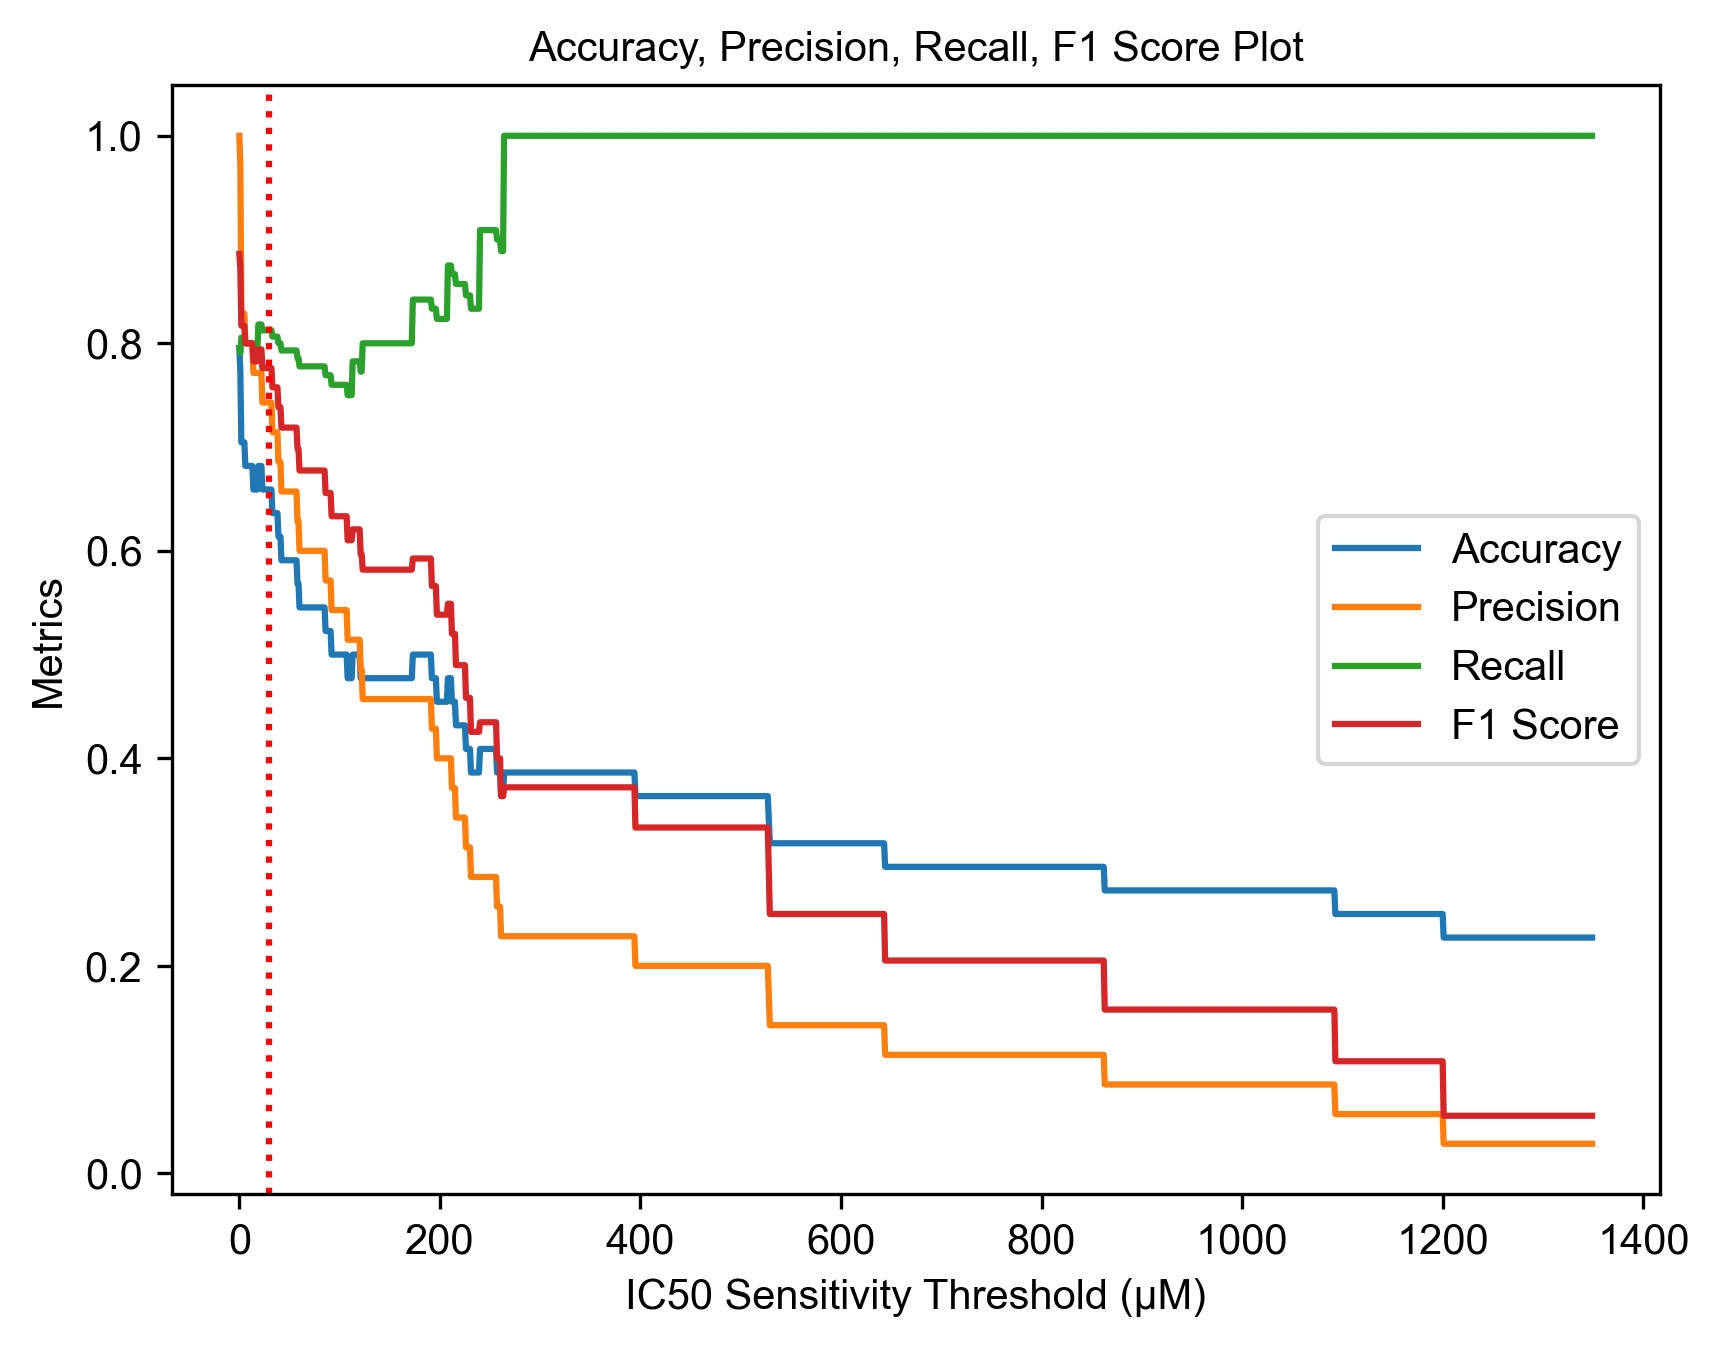

In [39]:
# グラフのサイズと解像度を設定
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams['font.size'] = 10  # すべての文字サイズを10に統一
plt.figure(dpi=300)

# プロット
plt.plot(accs, label="Accuracy")
plt.plot(precs, label="Precision")
plt.plot(recalls, label="Recall")
plt.plot(f1s, label="F1 Score")
plt.axvline(x=30, color="red", linestyle=":")

# 凡例の追加
plt.legend(fontsize=10)  # 凡例のフォントサイズを指定

# タイトルとラベルの追加
plt.title("Accuracy, Precision, Recall, F1 Score Plot", fontsize=10)
plt.xlabel("IC50 Sensitivity Threshold (μM)", fontsize=10)
plt.ylabel("Metrics", fontsize=10)

# グラフの表示
plt.show()